# **Segmentez des clients d'un site e-commerce**

In [ ]:
pip install numpy pandas scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msn
import seaborn as sns
import plotly.express as px
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer, SimpleImputer, IterativeImputer
from sklearn.linear_model import LinearRegression

##   **Importation fichier**

In [ ]:
# Afficher toutes les colonnes
pd.options.display.max_columns = None

In [ ]:
data_orders = pd.read_csv('orders.csv')
data_order_items = pd.read_csv('order_items.csv')
data_order_pymts = pd.read_csv('order_pymts.csv')
data_geoloc = pd.read_csv('geoloc.csv')
data_order_reviews = pd.read_csv('order_reviews.csv')
data_sellers = pd.read_csv('sellers.csv')
data_translation = pd.read_csv('translation.csv')
data_products = pd.read_csv('products.csv')
data_customers = pd.read_csv('customers.csv')


# **Exploration**

## **orders**

In [ ]:
# afficher les 5 premiere lignes
data_orders.head()

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# la taille
data_orders.shape



(99441, 9)

In [ ]:
# Les types de chaque variable
data_orders.dtypes

,0
index,int64
order_id,object
customer_id,object
order_status,object
order_purchase_timestamp,object
order_approved_at,object
order_delivered_carrier_date,object
order_delivered_customer_date,object
order_estimated_delivery_date,object


In [ ]:
# Le nombre de ligne dupliquer
data_orders.duplicated().sum()

0

In [ ]:
data_orders.isnull().sum()

,0
index,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
# Calculer le taux de remplissage des colonnes
missing_values = data_orders.isnull().mean() * 100
print(missing_values)

index                            0.000000
order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64


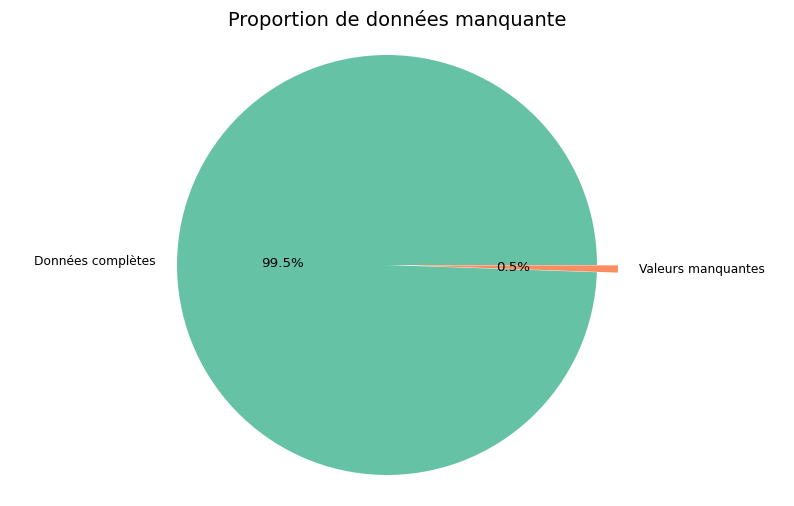

In [ ]:
# proportion de donnee manquante
total_manquant = np.prod(data_orders.shape)
valeur_manquant = data_orders.isna().sum().sum()
labels = ["Données complètes", "Valeurs manquantes"]
vals = [total_manquant - valeur_manquant, valeur_manquant]
explose = (0, 0.1)
couleurs = ['#66c2a5', '#fc8d62']  

# Création du graphique en secteurs
plt.figure(figsize=[10, 6])  
plt.pie(x=vals, labels=labels, explode=explose, autopct="%.1f%%", pctdistance=0.5, colors=couleurs)  
plt.title("Proportion de données manquante", fontsize=14)  
plt.axis("equal")  
plt.show() 

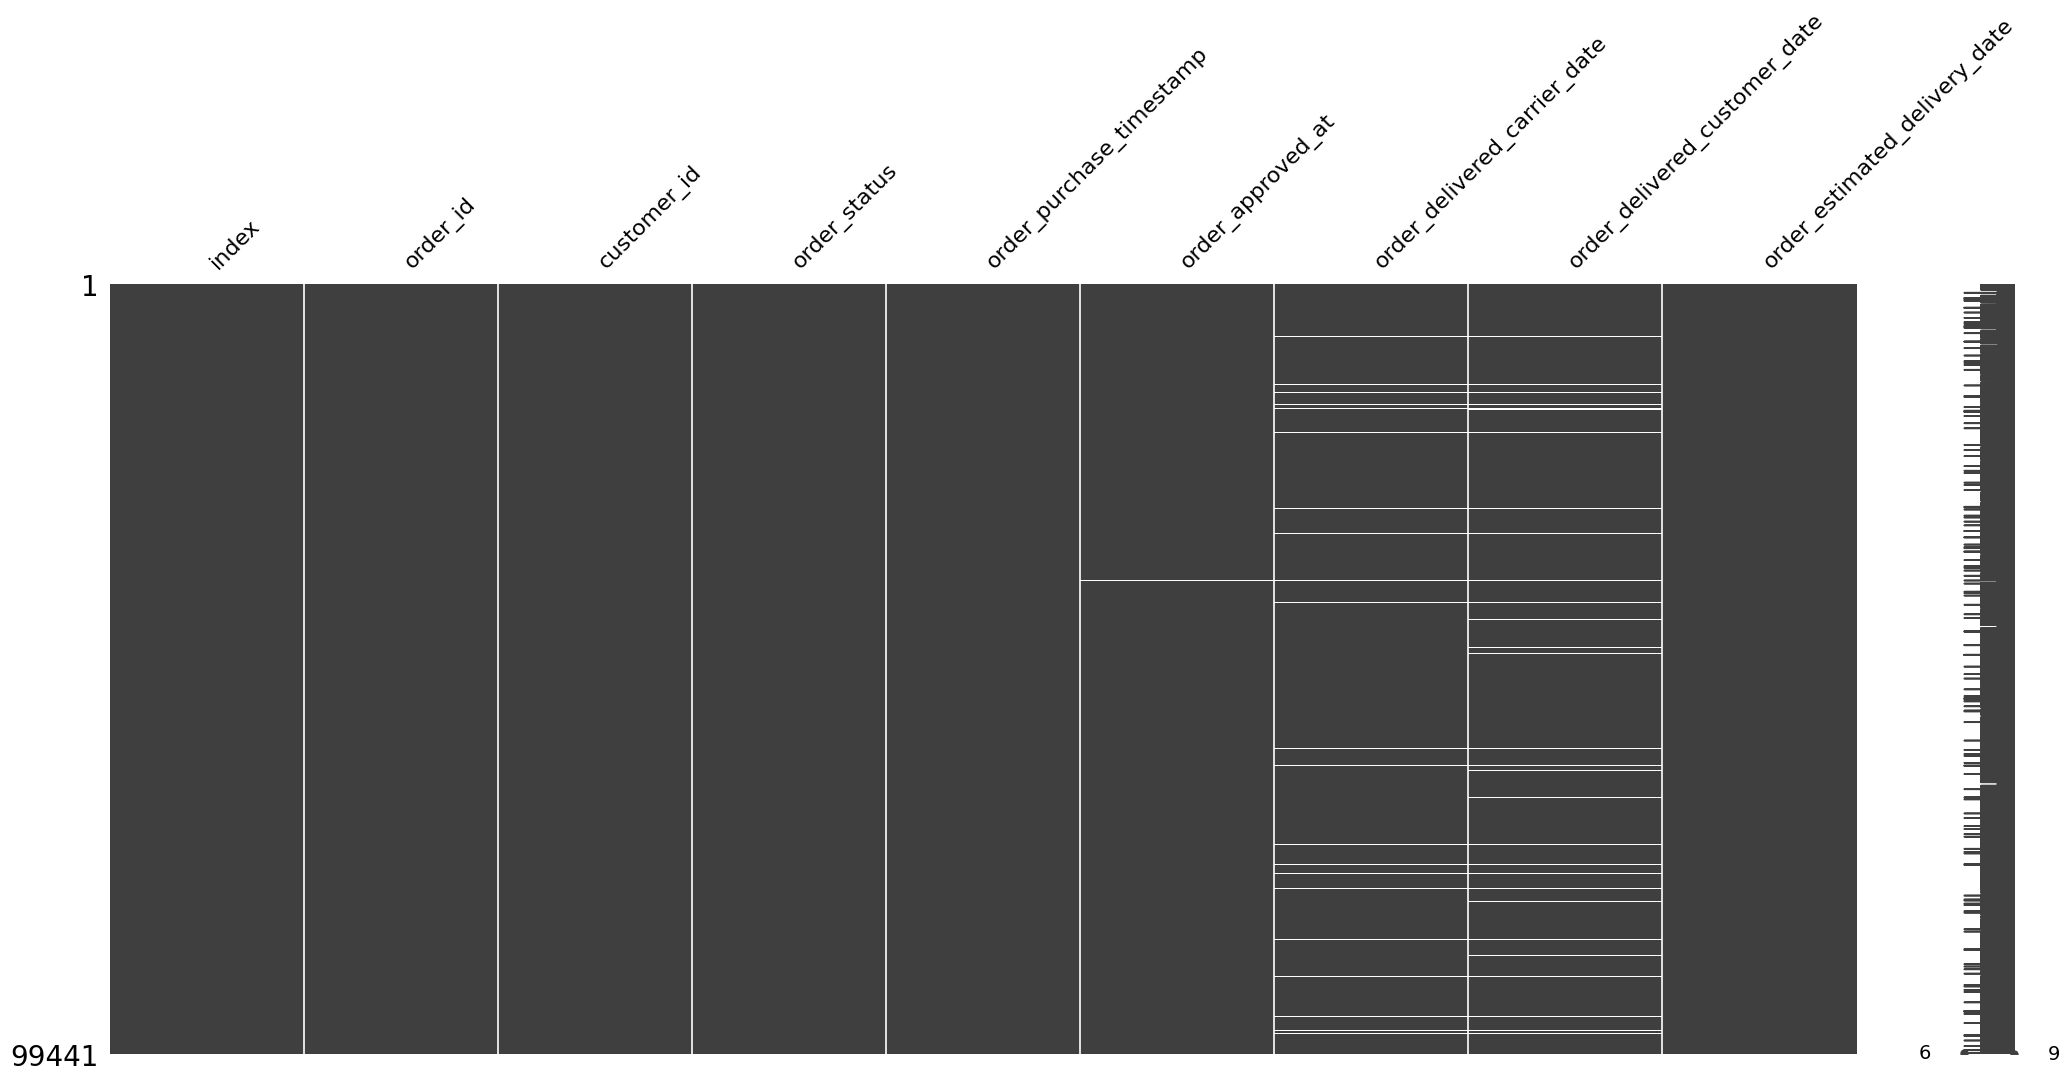

In [ ]:
# Missigno
msn.matrix(data_orders)
plt.show()

In [ ]:
data_orders.describe()

,index
count,99441.000000
mean,49720.000000
std,28706.288396
min,0.000000
25%,24860.000000
50%,49720.000000
75%,74580.000000
max,99440.000000


## **order_items**

In [ ]:
data_order_items.head()

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
# la taille
data_order_items.shape

(112650, 8)

In [ ]:
# Les types de chaque variable
data_order_items.dtypes

,0
index,int64
order_id,object
order_item_id,int64
product_id,object
seller_id,object
shipping_limit_date,object
price,float64
freight_value,float64


In [ ]:
# Le nombre de ligne dupliquer
data_order_items.duplicated().sum()

0

In [ ]:
# Calculer le taux de remplissage des colonnes
missing_values = data_order_items.isnull().mean() * 100
print(missing_values)

index                  0.0
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64


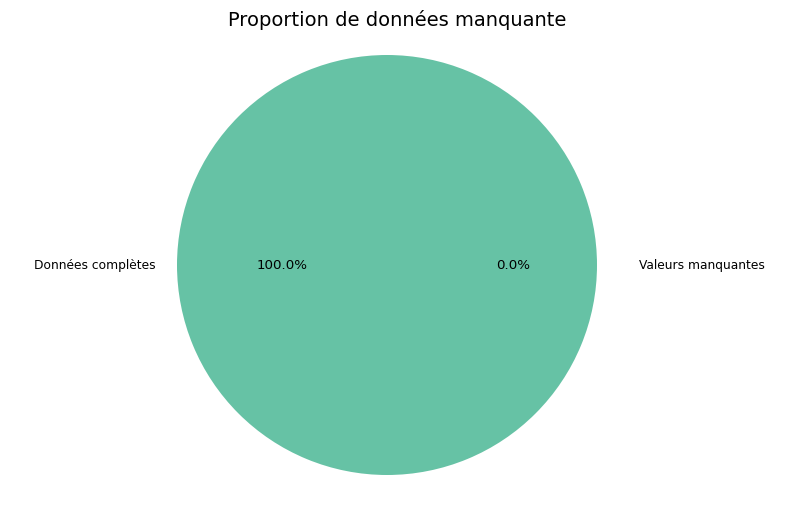

In [ ]:
# proportion de donnee manquante
total_manquant = np.prod(data_order_items.shape)
valeur_manquant = data_order_items.isna().sum().sum()
labels = ["Données complètes", "Valeurs manquantes"]
vals = [total_manquant - valeur_manquant, valeur_manquant]
explose = (0, 0.1) 
couleurs = ['#66c2a5', '#fc8d62'] 

# Création du graphique en secteurs
plt.figure(figsize=[10, 6])  
plt.pie(x=vals, labels=labels, explode=explose, autopct="%.1f%%", pctdistance=0.5, colors=couleurs) 
plt.title("Proportion de données manquante", fontsize=14) 
plt.axis("equal") 
plt.show()  #

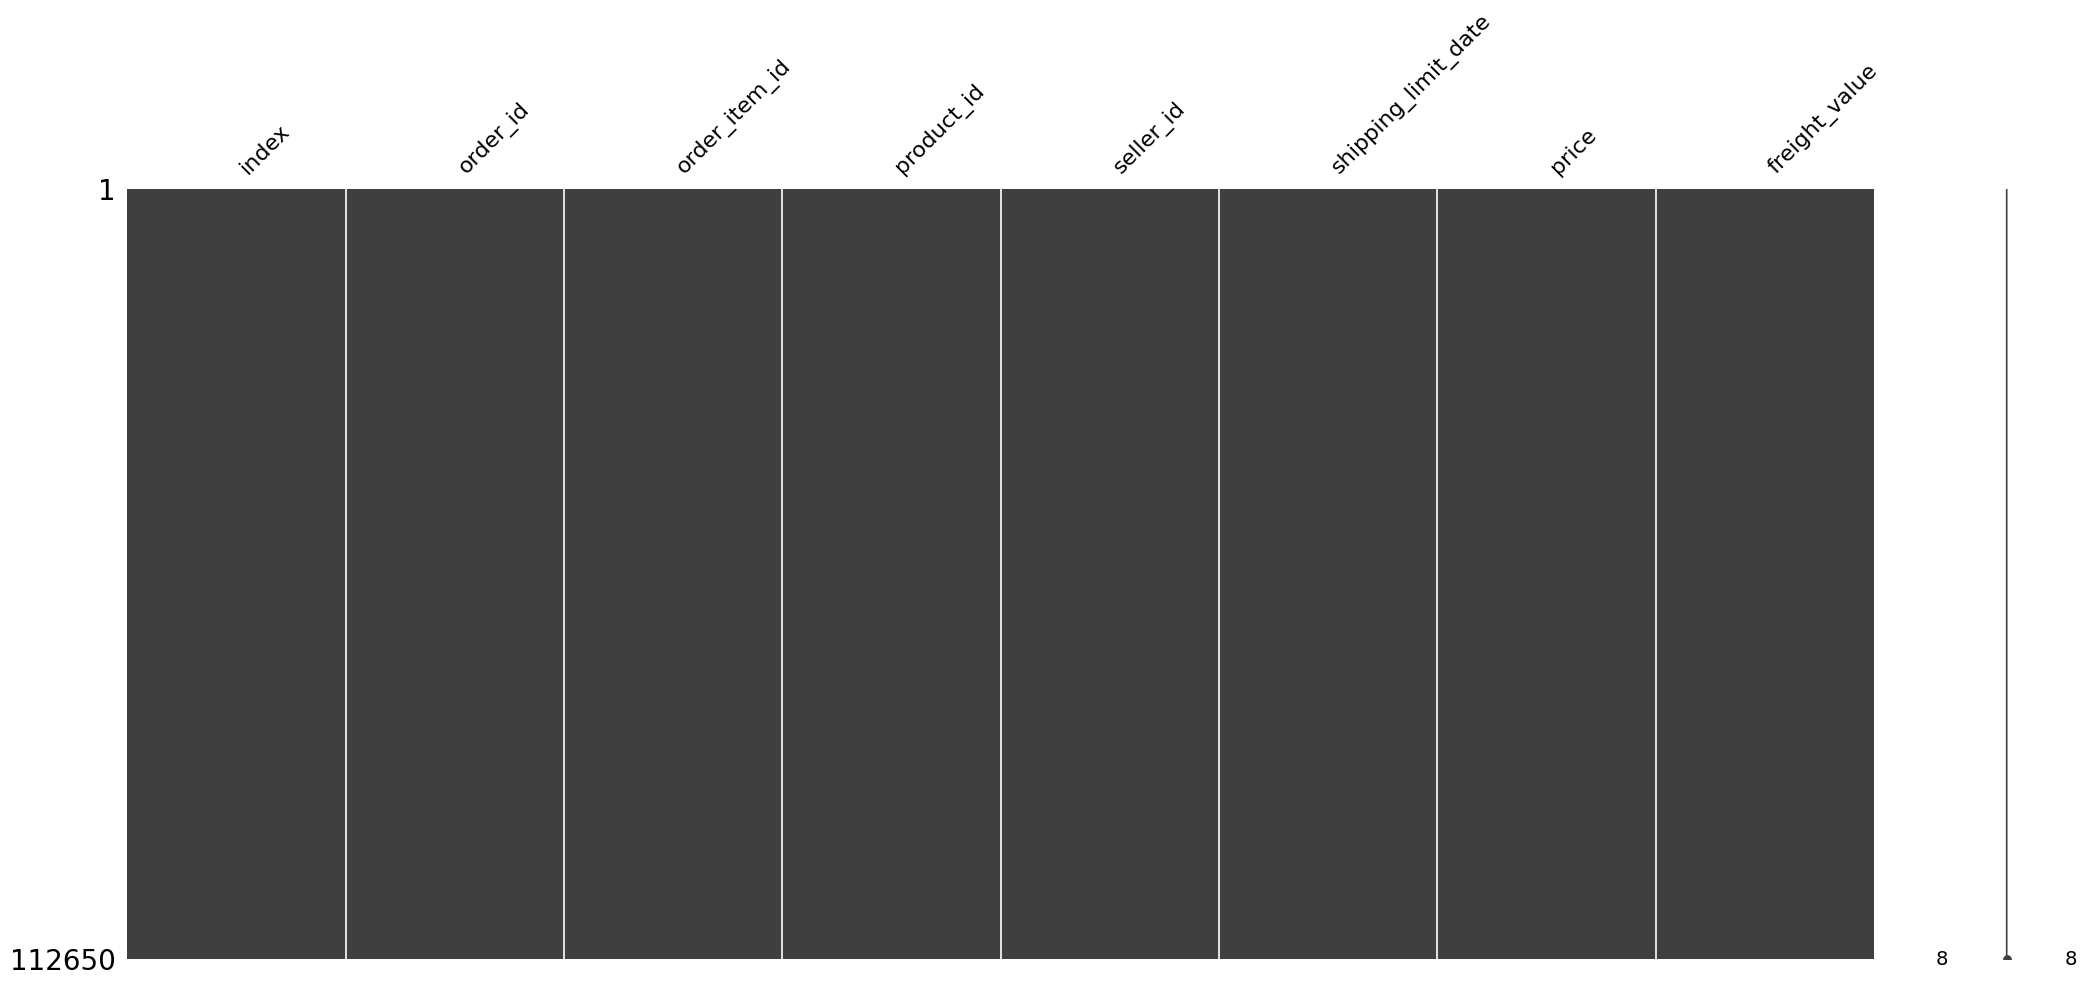

In [ ]:
# Missigno
msn.matrix(data_order_items)
plt.show()

In [ ]:
data_order_items.describe()


,index,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000,112650.000000
mean,56324.500000,1.197834,120.653739,19.990320
std,32519.398249,0.705124,183.633928,15.806405
min,0.000000,1.000000,0.850000,0.000000
25%,28162.250000,1.000000,39.900000,13.080000
50%,56324.500000,1.000000,74.990000,16.260000
75%,84486.750000,1.000000,134.900000,21.150000
max,112649.000000,21.000000,6735.000000,409.680000


## **order_pymts**

In [ ]:
data_order_pymts.head()

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
# la taille
data_order_pymts.shape

(103886, 6)

In [ ]:
# Les types de chaque variable
data_order_pymts.dtypes

,0
index,int64
order_id,object
payment_sequential,int64
payment_type,object
payment_installments,int64
payment_value,float64


In [ ]:
# Le nombre de ligne dupliquer
data_order_pymts.duplicated().sum()

0

In [ ]:
# Calculer le taux de remplissage des colonnes
missing_values = data_order_pymts.isnull().mean() * 100
print(missing_values)

index                   0.0
order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64


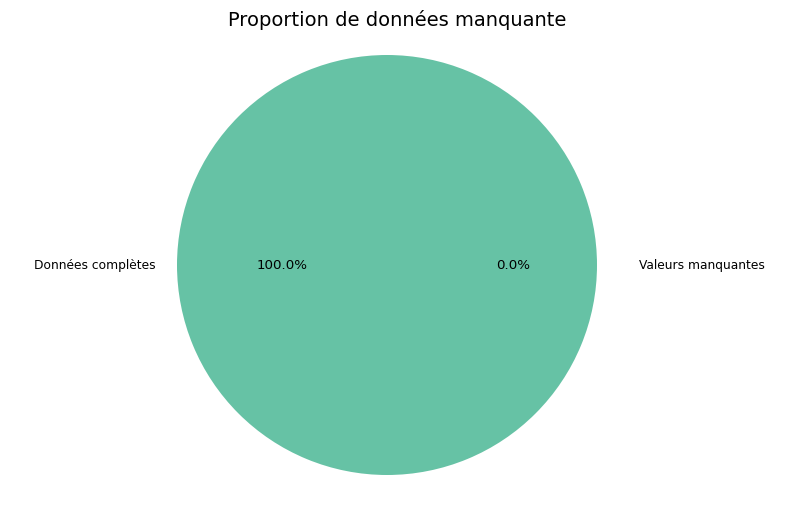

In [ ]:
# proportion de donnee manquante
total_manquant = np.prod(data_order_pymts.shape)
valeur_manquant = data_order_pymts.isna().sum().sum()
labels = ["Données complètes", "Valeurs manquantes"]
vals = [total_manquant - valeur_manquant, valeur_manquant]
explose = (0, 0.1)  
couleurs = ['#66c2a5', '#fc8d62'] 

# Création du graphique en secteurs
plt.figure(figsize=[10, 6])  
plt.pie(x=vals, labels=labels, explode=explose, autopct="%.1f%%", pctdistance=0.5, colors=couleurs)  
plt.title("Proportion de données manquante", fontsize=14)  
plt.axis("equal")  
plt.show()  

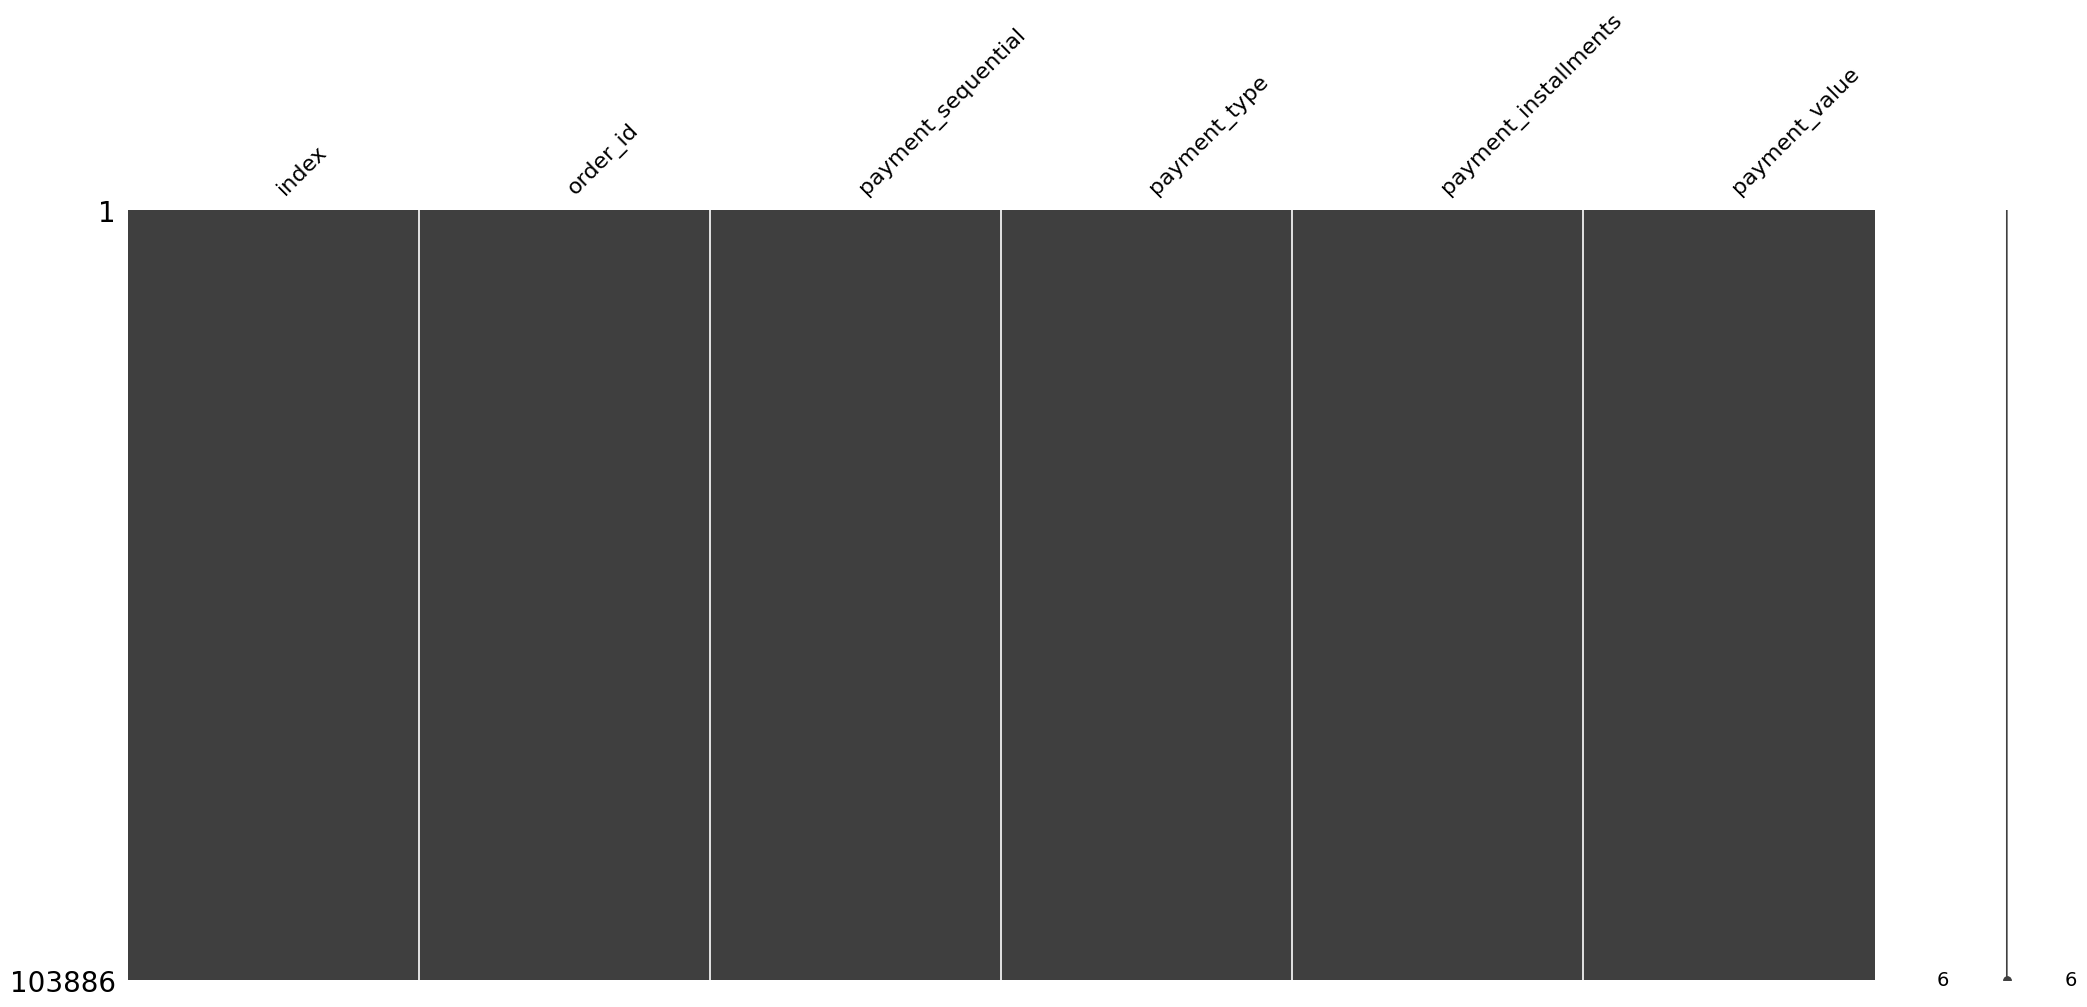

In [ ]:
# Missigno
msn.matrix(data_order_pymts)
plt.show()

In [ ]:
data_order_pymts.describe()


,index,payment_sequential,payment_installments,payment_value
count,103886.00000,103886.000000,103886.000000,103886.000000
mean,51942.50000,1.092679,2.853349,154.100380
std,29989.44937,0.706584,2.687051,217.494064
min,0.00000,1.000000,0.000000,0.000000
25%,25971.25000,1.000000,1.000000,56.790000
50%,51942.50000,1.000000,1.000000,100.000000
75%,77913.75000,1.000000,4.000000,171.837500
max,103885.00000,29.000000,24.000000,13664.080000


## **geoloc**

In [ ]:
data_geoloc.head()

,index,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,0,1037,-23.545621,-46.639292,sao paulo,SP
1,1,1046,-23.546081,-46.644820,sao paulo,SP
2,2,1046,-23.546129,-46.642951,sao paulo,SP
3,3,1041,-23.544392,-46.639499,sao paulo,SP
4,4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
# la taille
data_geoloc.shape

(1000163, 6)

In [ ]:
# Les types de chaque variable
data_geoloc.dtypes

,0
index,int64
geolocation_zip_code_prefix,int64
geolocation_lat,float64
geolocation_lng,float64
geolocation_city,object
geolocation_state,object


In [ ]:
# Le nombre de ligne dupliquer
data_geoloc.duplicated().sum()

0

In [ ]:
# Calculer le taux de remplissage des colonnes
missing_values = data_geoloc.isnull().mean() * 100
print(missing_values)

index                          0.0
geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64


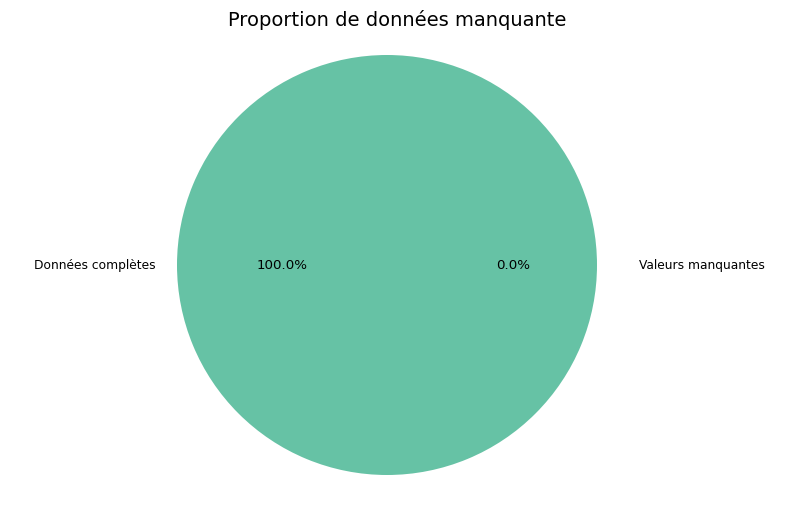

In [ ]:
# proportion de donnee manquante
total_manquant = np.prod(data_geoloc.shape)
valeur_manquant = data_geoloc.isna().sum().sum()
labels = ["Données complètes", "Valeurs manquantes"]
vals = [total_manquant - valeur_manquant, valeur_manquant]
explose = (0, 0.1)  # Explosion de la tranche de "Valeurs manquantes"
couleurs = ['#66c2a5', '#fc8d62']  # Couleurs des tranches

# Création du graphique en secteurs
plt.figure(figsize=[10, 6])  # Définition de la taille du graphique
plt.pie(x=vals, labels=labels, explode=explose, autopct="%.1f%%", pctdistance=0.5, colors=couleurs)  # Création du graphique en secteurs
plt.title("Proportion de données manquante", fontsize=14)  # Ajout du titre
plt.axis("equal")  # Assure que le graphique est un cercle
plt.show()  # Affichage du graphique

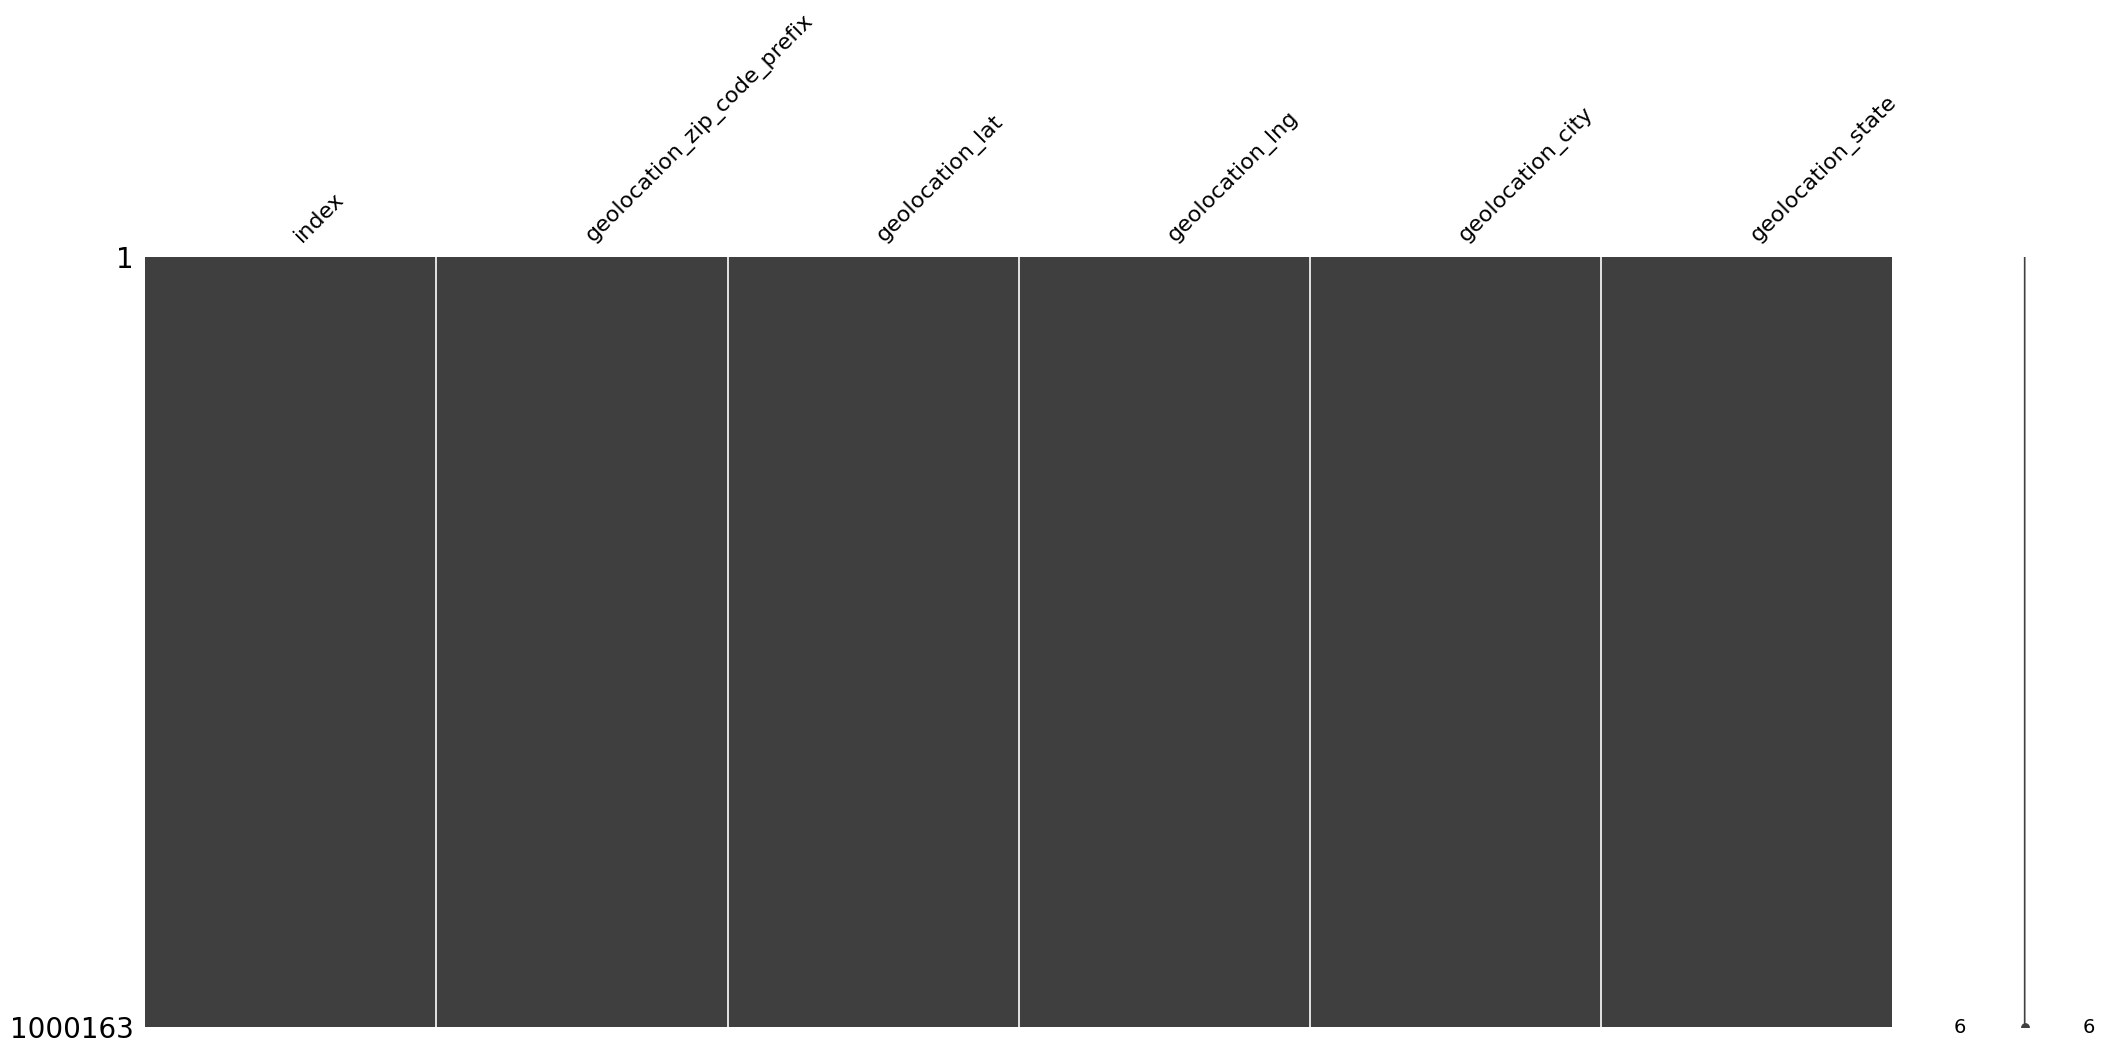

In [ ]:
# Missigno
msn.matrix(data_geoloc)
plt.show()

In [ ]:
data_geoloc.describe()


,index,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06,1.000163e+06
mean,5.000810e+05,3.657417e+04,-2.117615e+01,-4.639054e+01
std,2.887223e+05,3.054934e+04,5.715866e+00,4.269748e+00
min,0.000000e+00,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,2.500405e+05,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,5.000810e+05,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,7.501215e+05,6.350400e+04,-1.997962e+01,-4.376771e+01
max,1.000162e+06,9.999000e+04,4.506593e+01,1.211054e+02


## **order_reviews**

In [ ]:
data_order_reviews.head()

,index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
# la taille
data_order_reviews.shape

(99224, 8)

In [ ]:
# Les types de chaque variable
data_order_reviews.dtypes

,0
index,int64
review_id,object
order_id,object
review_score,int64
review_comment_title,object
review_comment_message,object
review_creation_date,object
review_answer_timestamp,object


In [ ]:
# Le nombre de ligne dupliquer
data_order_reviews.duplicated().sum()

0

In [ ]:
# Calculer le taux de remplissage des colonnes
missing_values = data_order_reviews.isnull().mean() * 100
print(missing_values)

index                       0.000000
review_id                   0.000000
order_id                    0.000000
review_score                0.000000
review_comment_title       88.341530
review_comment_message     58.702532
review_creation_date        0.000000
review_answer_timestamp     0.000000
dtype: float64


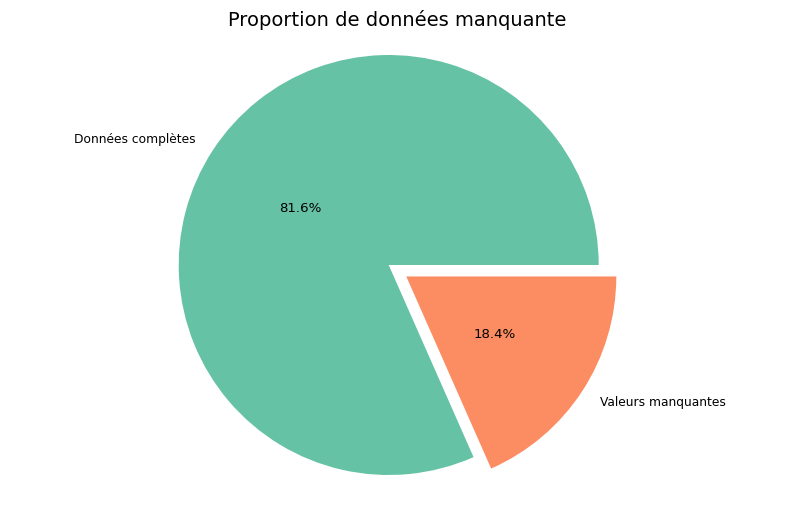

In [ ]:

# proportion de donnee manquante
total_manquant = np.prod(data_order_reviews.shape)
valeur_manquant = data_order_reviews.isna().sum().sum()
labels = ["Données complètes", "Valeurs manquantes"]
vals = [total_manquant - valeur_manquant, valeur_manquant]
explose = (0, 0.1)  
couleurs = ['#66c2a5', '#fc8d62']  

# Création du graphique en secteurs
plt.figure(figsize=[10, 6]) 
plt.pie(x=vals, labels=labels, explode=explose, autopct="%.1f%%", pctdistance=0.5, colors=couleurs)  # Création du graphique en secteurs
plt.axis("equal")
plt.show()  

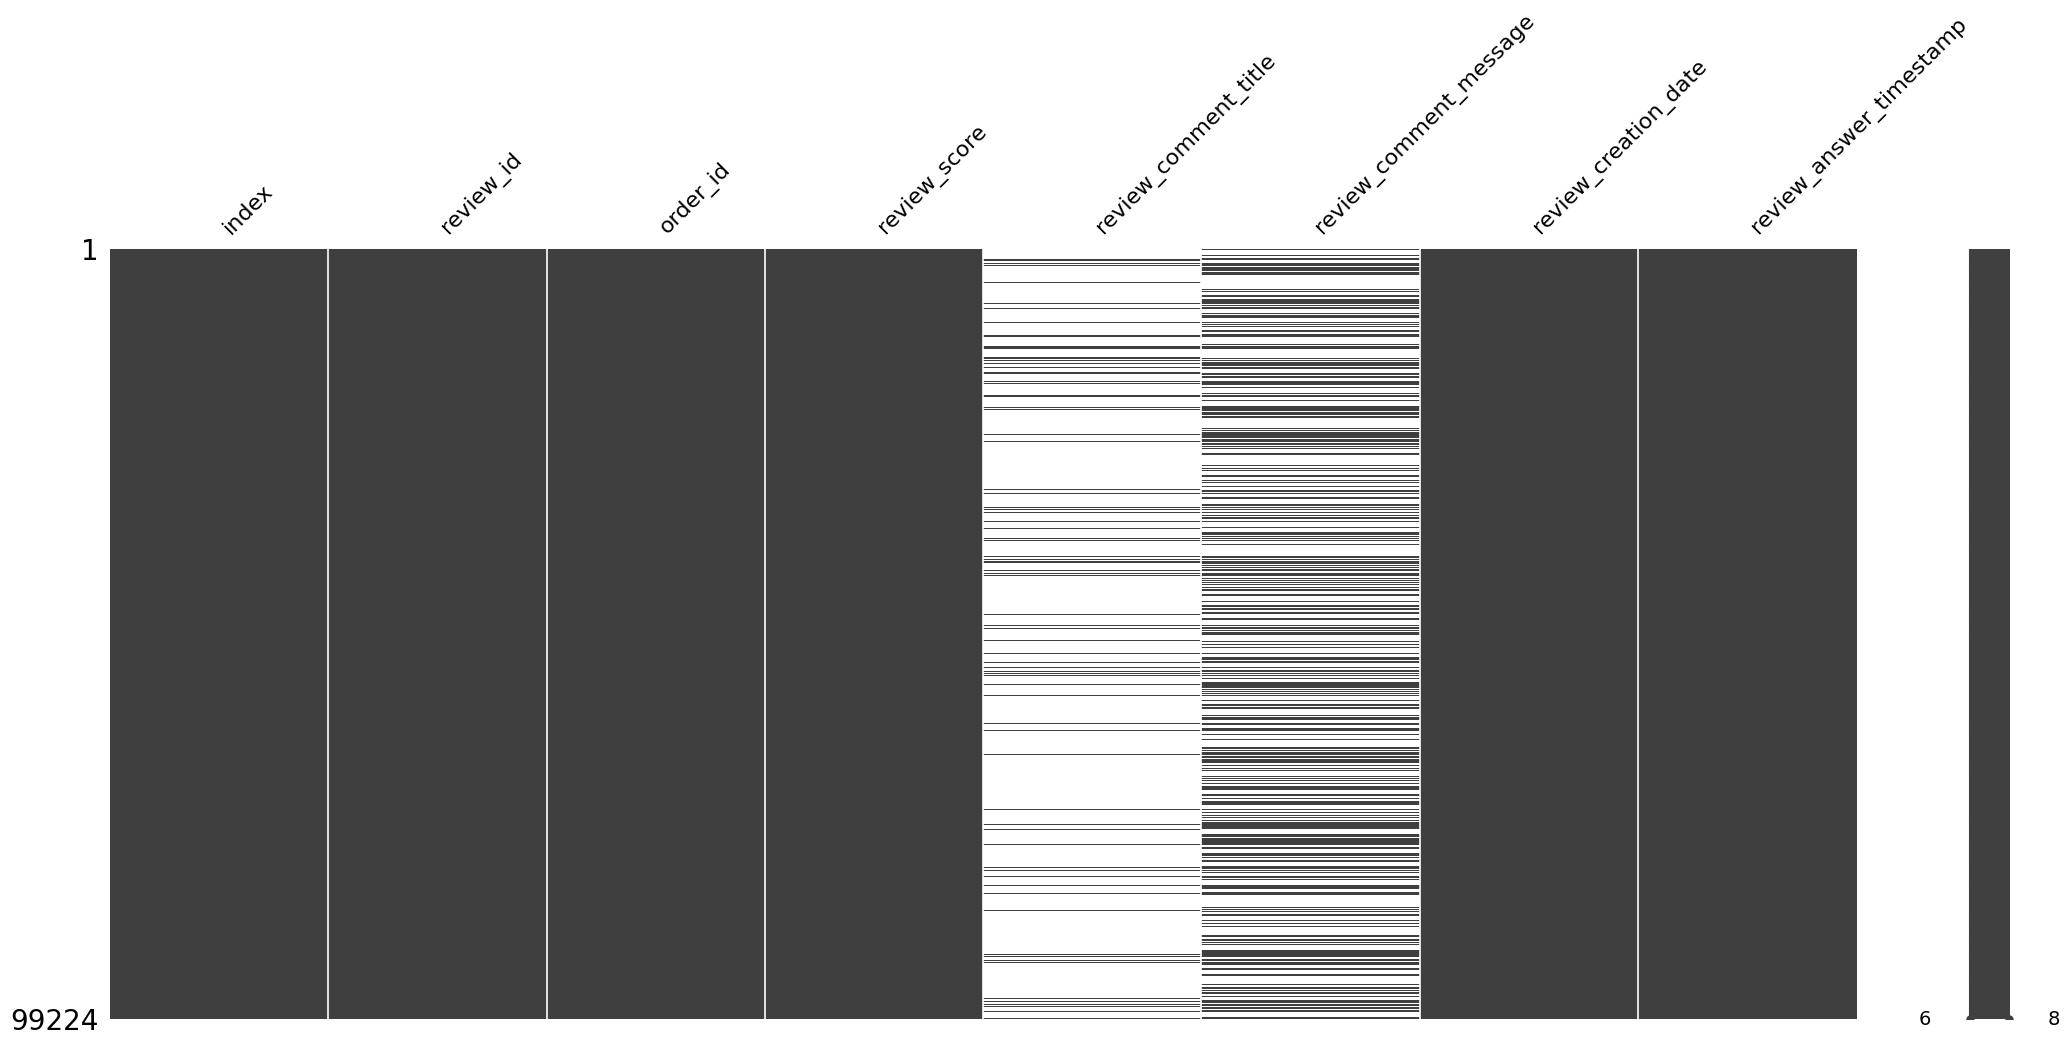

In [ ]:
# Missigno
msn.matrix(data_order_reviews)
plt.show()

In [ ]:
data_order_reviews.describe()


,index,review_score
count,99224.000000,99224.000000
mean,49611.500000,4.086421
std,28643.645892,1.347579
min,0.000000,1.000000
25%,24805.750000,4.000000
50%,49611.500000,5.000000
75%,74417.250000,5.000000
max,99223.000000,5.000000


## **sellers**

In [ ]:
data_sellers.head()

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
# la taille
data_sellers.shape

(3095, 5)

In [ ]:
# Les types de chaque variable
data_sellers.dtypes

,0
index,int64
seller_id,object
seller_zip_code_prefix,int64
seller_city,object
seller_state,object


In [ ]:
# Le nombre de ligne dupliquer
data_sellers.duplicated().sum()

0

In [ ]:
# Calculer le taux de remplissage des colonnes
missing_values = data_sellers.isnull().mean() * 100
print(missing_values)

index                     0.0
seller_id                 0.0
seller_zip_code_prefix    0.0
seller_city               0.0
seller_state              0.0
dtype: float64


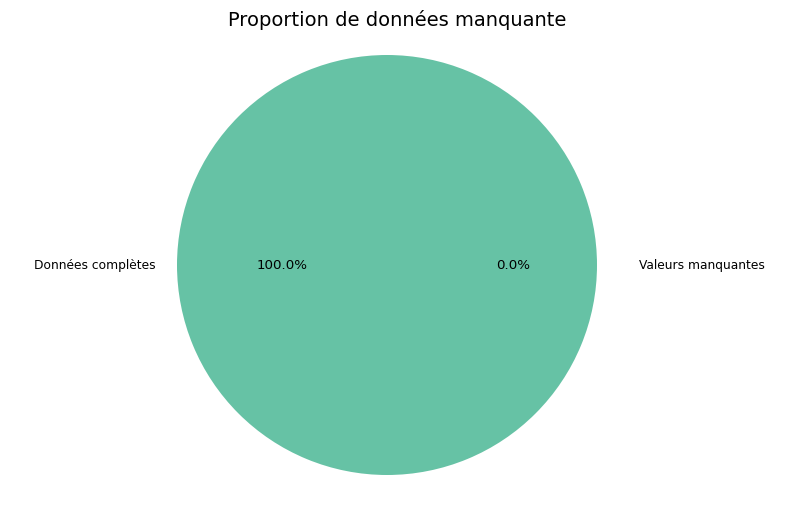

In [ ]:
# proportion de donnee manquante
total_manquant = np.prod(data_sellers.shape)
valeur_manquant = data_sellers.isna().sum().sum()
labels = ["Données complètes", "Valeurs manquantes"]
vals = [total_manquant - valeur_manquant, valeur_manquant]
explose = (0, 0.1)  
couleurs = ['#66c2a5', '#fc8d62'] 

# Création du graphique en secteurs
plt.figure(figsize=[10, 6]) 
plt.pie(x=vals, labels=labels, explode=explose, autopct="%.1f%%", pctdistance=0.5, colors=couleurs)  
plt.title("Proportion de données manquante", fontsize=14)  
plt.axis("equal")  
plt.show()  

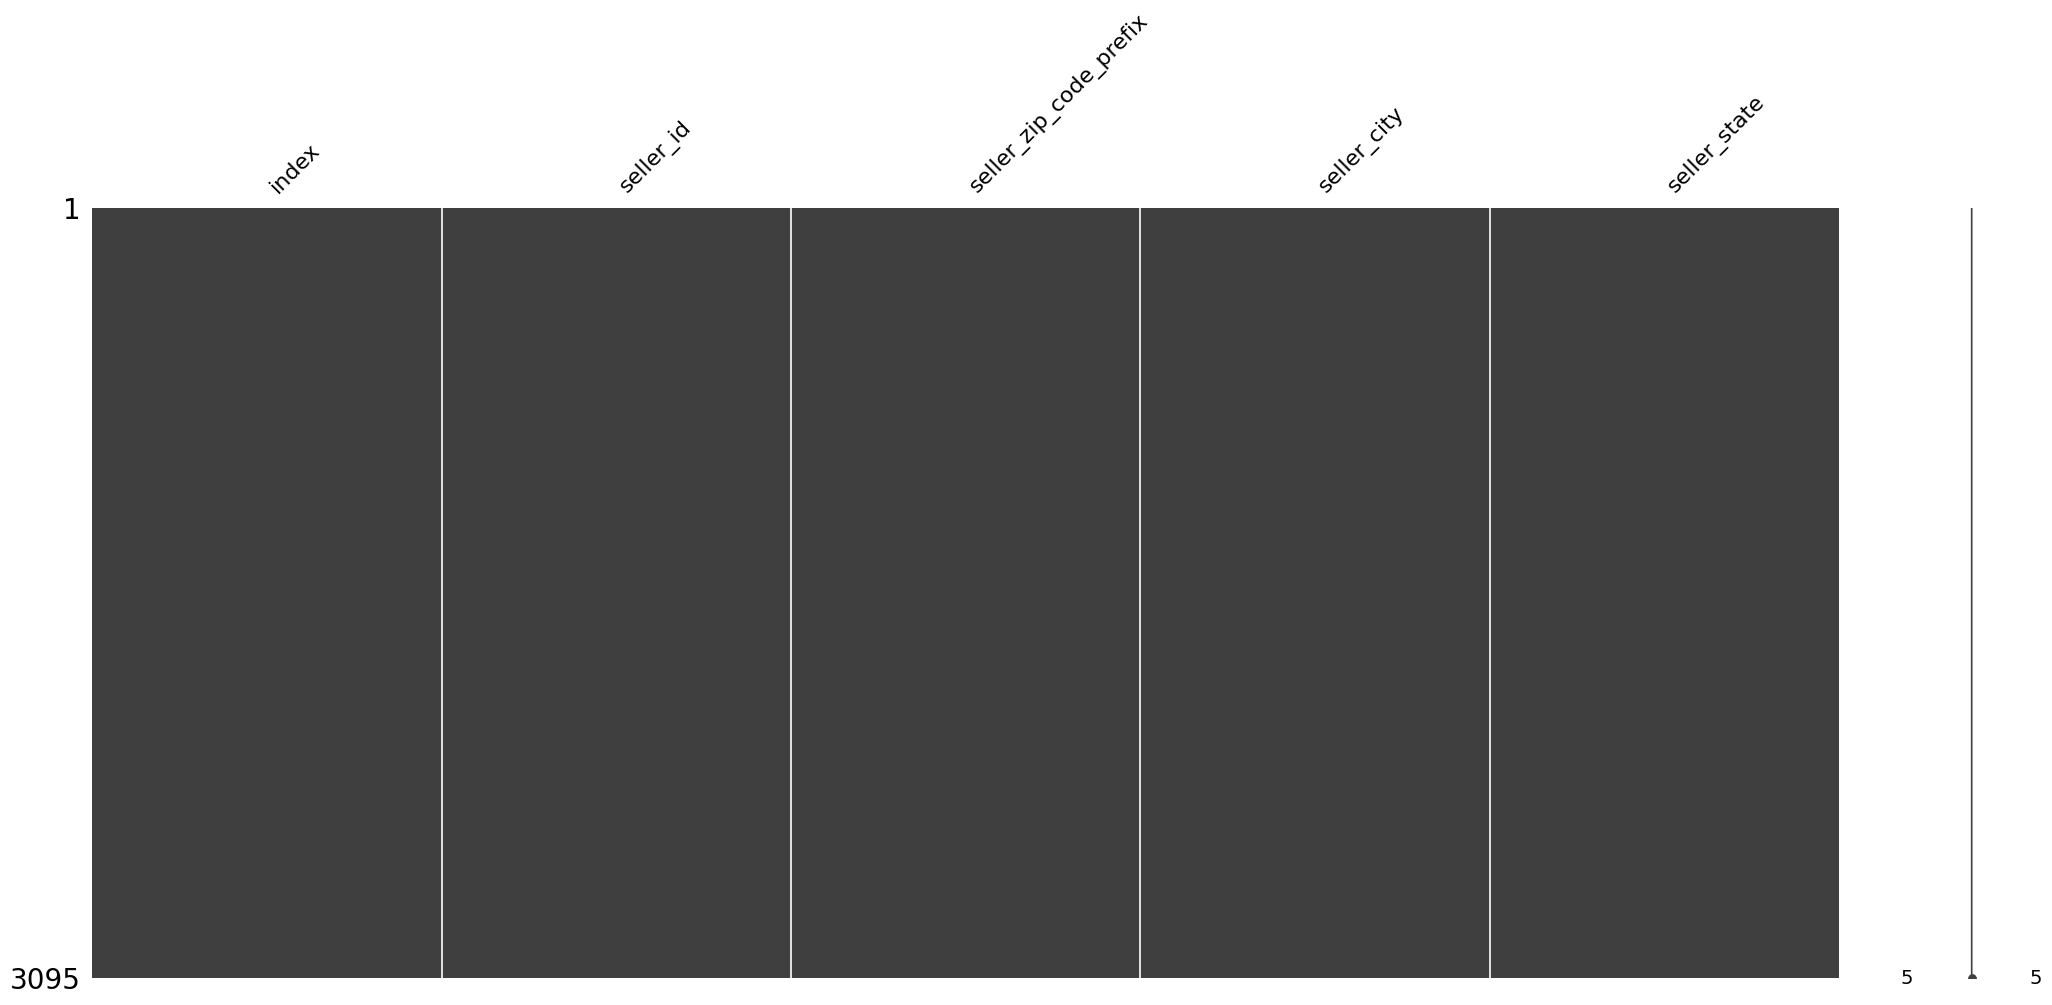

In [ ]:
# Missigno
msn.matrix(data_sellers)
plt.show()

In [ ]:
data_sellers.describe()

,index,seller_zip_code_prefix
count,3095.000000,3095.000000
mean,1547.000000,32291.059451
std,893.593867,32713.453830
min,0.000000,1001.000000
25%,773.500000,7093.500000
50%,1547.000000,14940.000000
75%,2320.500000,64552.500000
max,3094.000000,99730.000000


## **translation**

In [ ]:
data_translation.head()

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor


In [ ]:
# la taille
data_translation.shape

(71, 3)

In [ ]:
# Les types de chaque variable
data_translation.dtypes

,0
index,int64
product_category_name,object
product_category_name_english,object


In [ ]:
# Le nombre de ligne dupliquer
data_translation.duplicated().sum()

0

In [ ]:
# Calculer le taux de remplissage des colonnes
missing_values = data_translation.isnull().mean() * 100
print(missing_values)

index                            0.0
product_category_name            0.0
product_category_name_english    0.0
dtype: float64


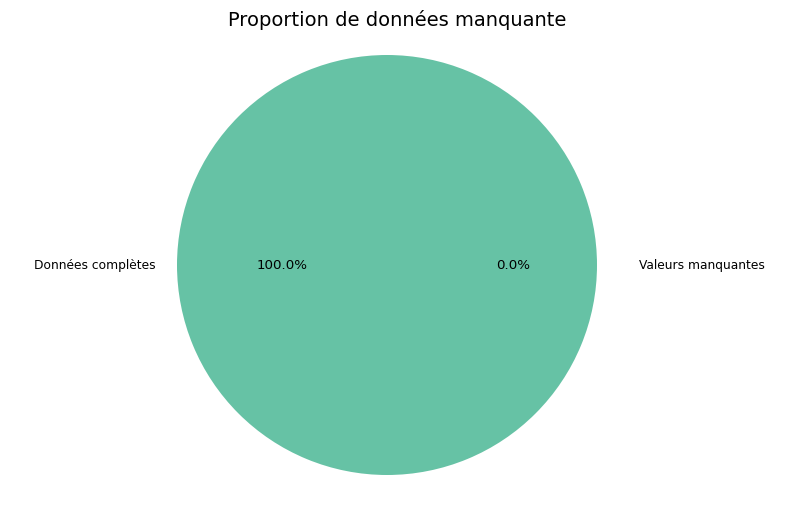

In [ ]:
# proportion de donnee manquante
total_manquant = np.prod(data_translation.shape)
valeur_manquant = data_translation.isna().sum().sum()
labels = ["Données complètes", "Valeurs manquantes"]
vals = [total_manquant - valeur_manquant, valeur_manquant]
explose = (0, 0.1)  
couleurs = ['#66c2a5', '#fc8d62'] 

# Création du graphique en secteurs
plt.figure(figsize=[10, 6])  
plt.pie(x=vals, labels=labels, explode=explose, autopct="%.1f%%", pctdistance=0.5, colors=couleurs)  
plt.title("Proportion de données manquante", fontsize=14) 
plt.axis("equal")  
plt.show() 

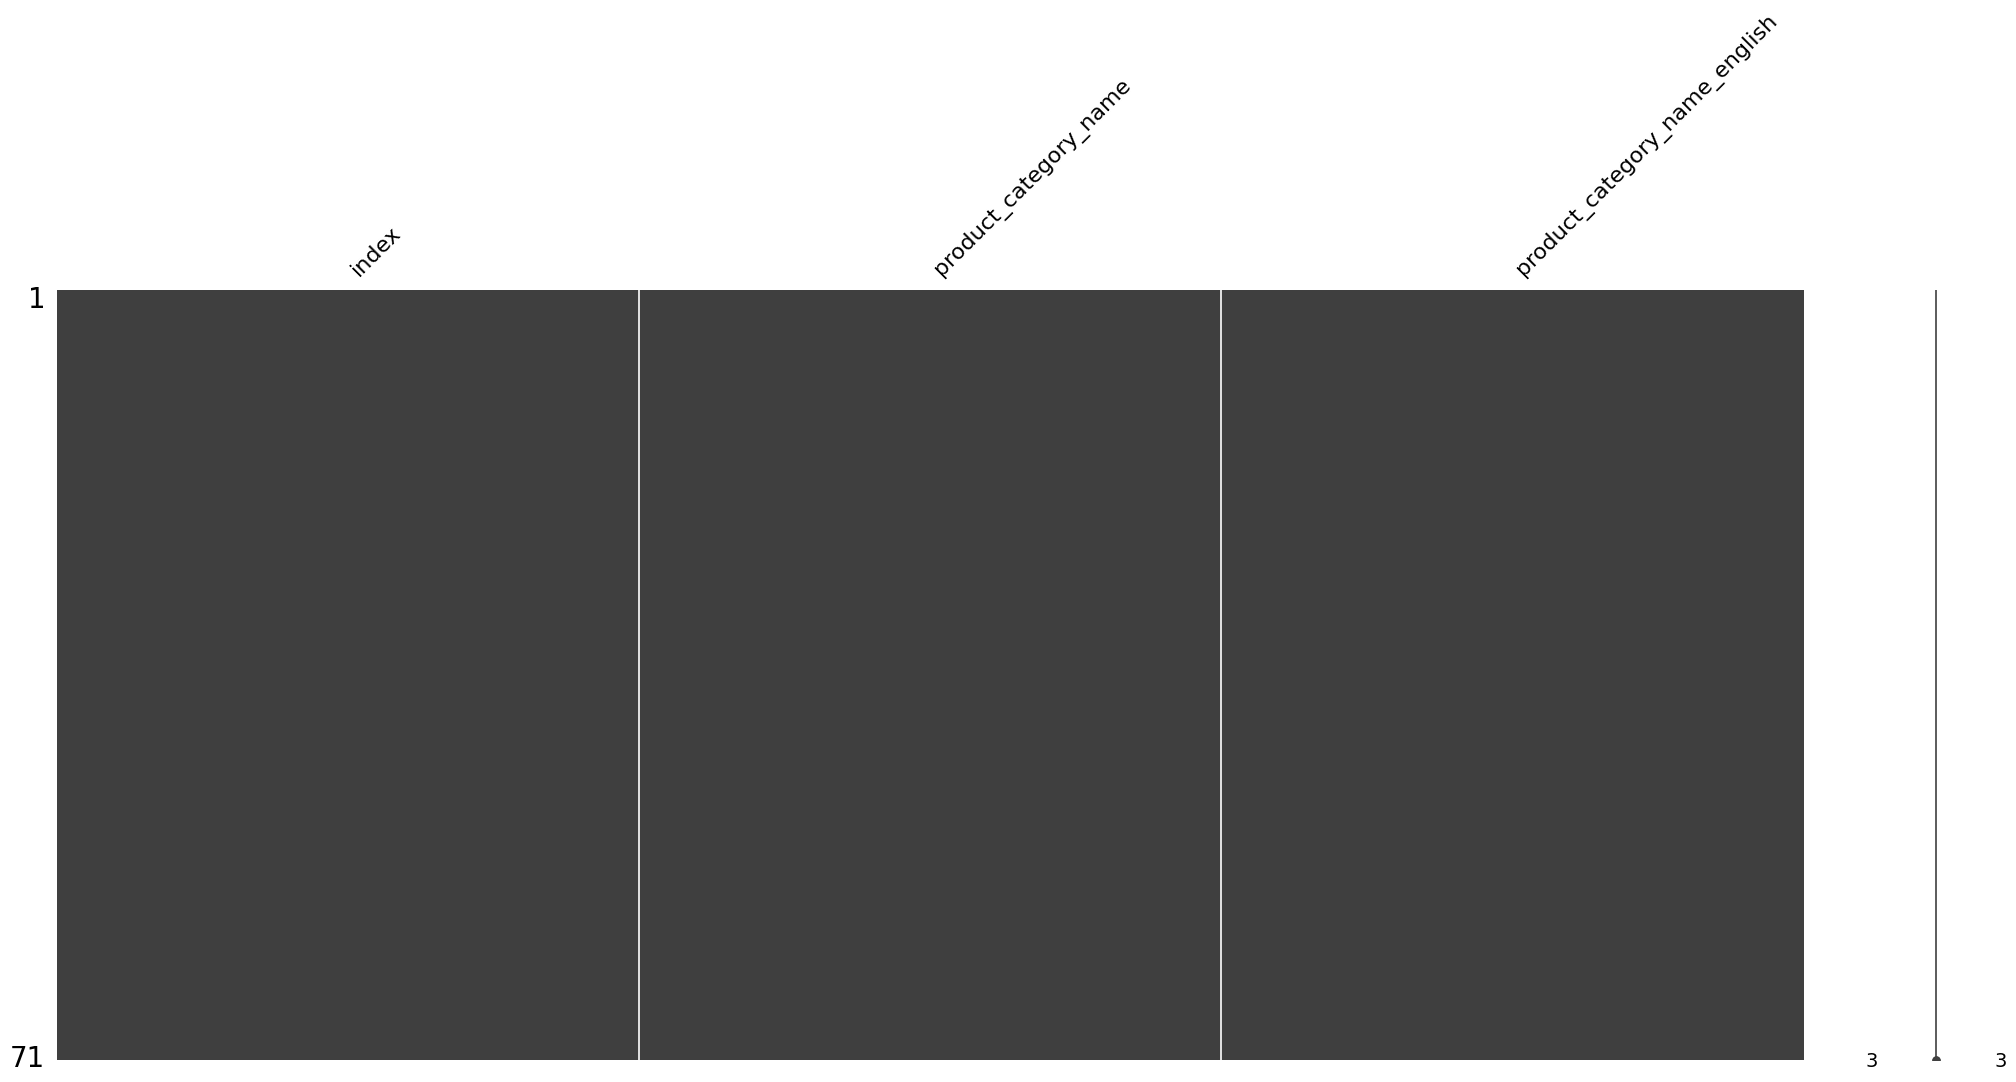

In [ ]:
# Missigno
msn.matrix(data_translation)
plt.show()

## **products**

In [ ]:
data_products.head()

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
# la taille
data_products.shape

(32951, 10)

In [ ]:
# Les types de chaque variable
data_products.dtypes

,0
index,int64
product_id,object
product_category_name,object
product_name_lenght,float64
product_description_lenght,float64
product_photos_qty,float64
product_weight_g,float64
product_length_cm,float64
product_height_cm,float64
product_width_cm,float64


In [ ]:
# Le nombre de ligne dupliquer
data_products.duplicated().sum()

0

In [ ]:
# Calculer le taux de remplissage des colonnes
missing_values = data_products.isnull().mean() * 100
print(missing_values)

index                         0.000000
product_id                    0.000000
product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64


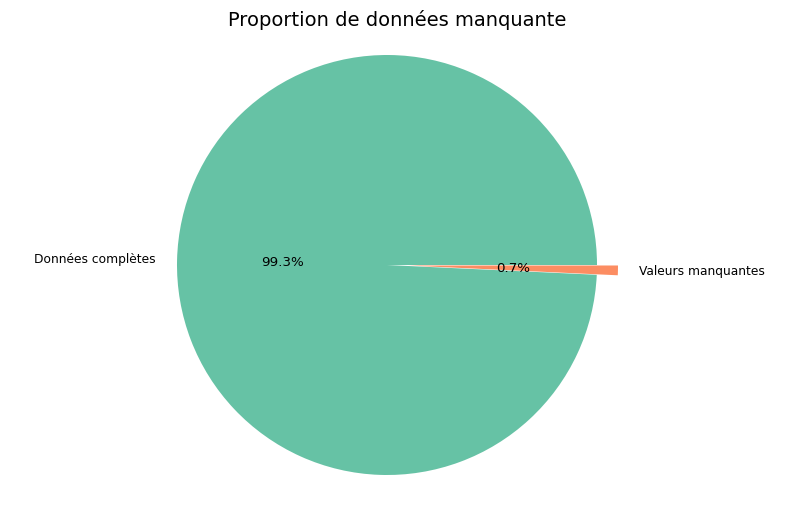

In [ ]:
# proportion de donnee manquante
total_manquant = np.prod(data_products.shape)
valeur_manquant = data_products.isna().sum().sum()
labels = ["Données complètes", "Valeurs manquantes"]
vals = [total_manquant - valeur_manquant, valeur_manquant]
explose = (0, 0.1)  
couleurs = ['#66c2a5', '#fc8d62'] 

# Création du graphique en secteurs
plt.figure(figsize=[10, 6]) 
plt.pie(x=vals, labels=labels, explode=explose, autopct="%.1f%%", pctdistance=0.5, colors=couleurs) 
plt.title("Proportion de données manquante", fontsize=14)  
plt.axis("equal")  
plt.show() 

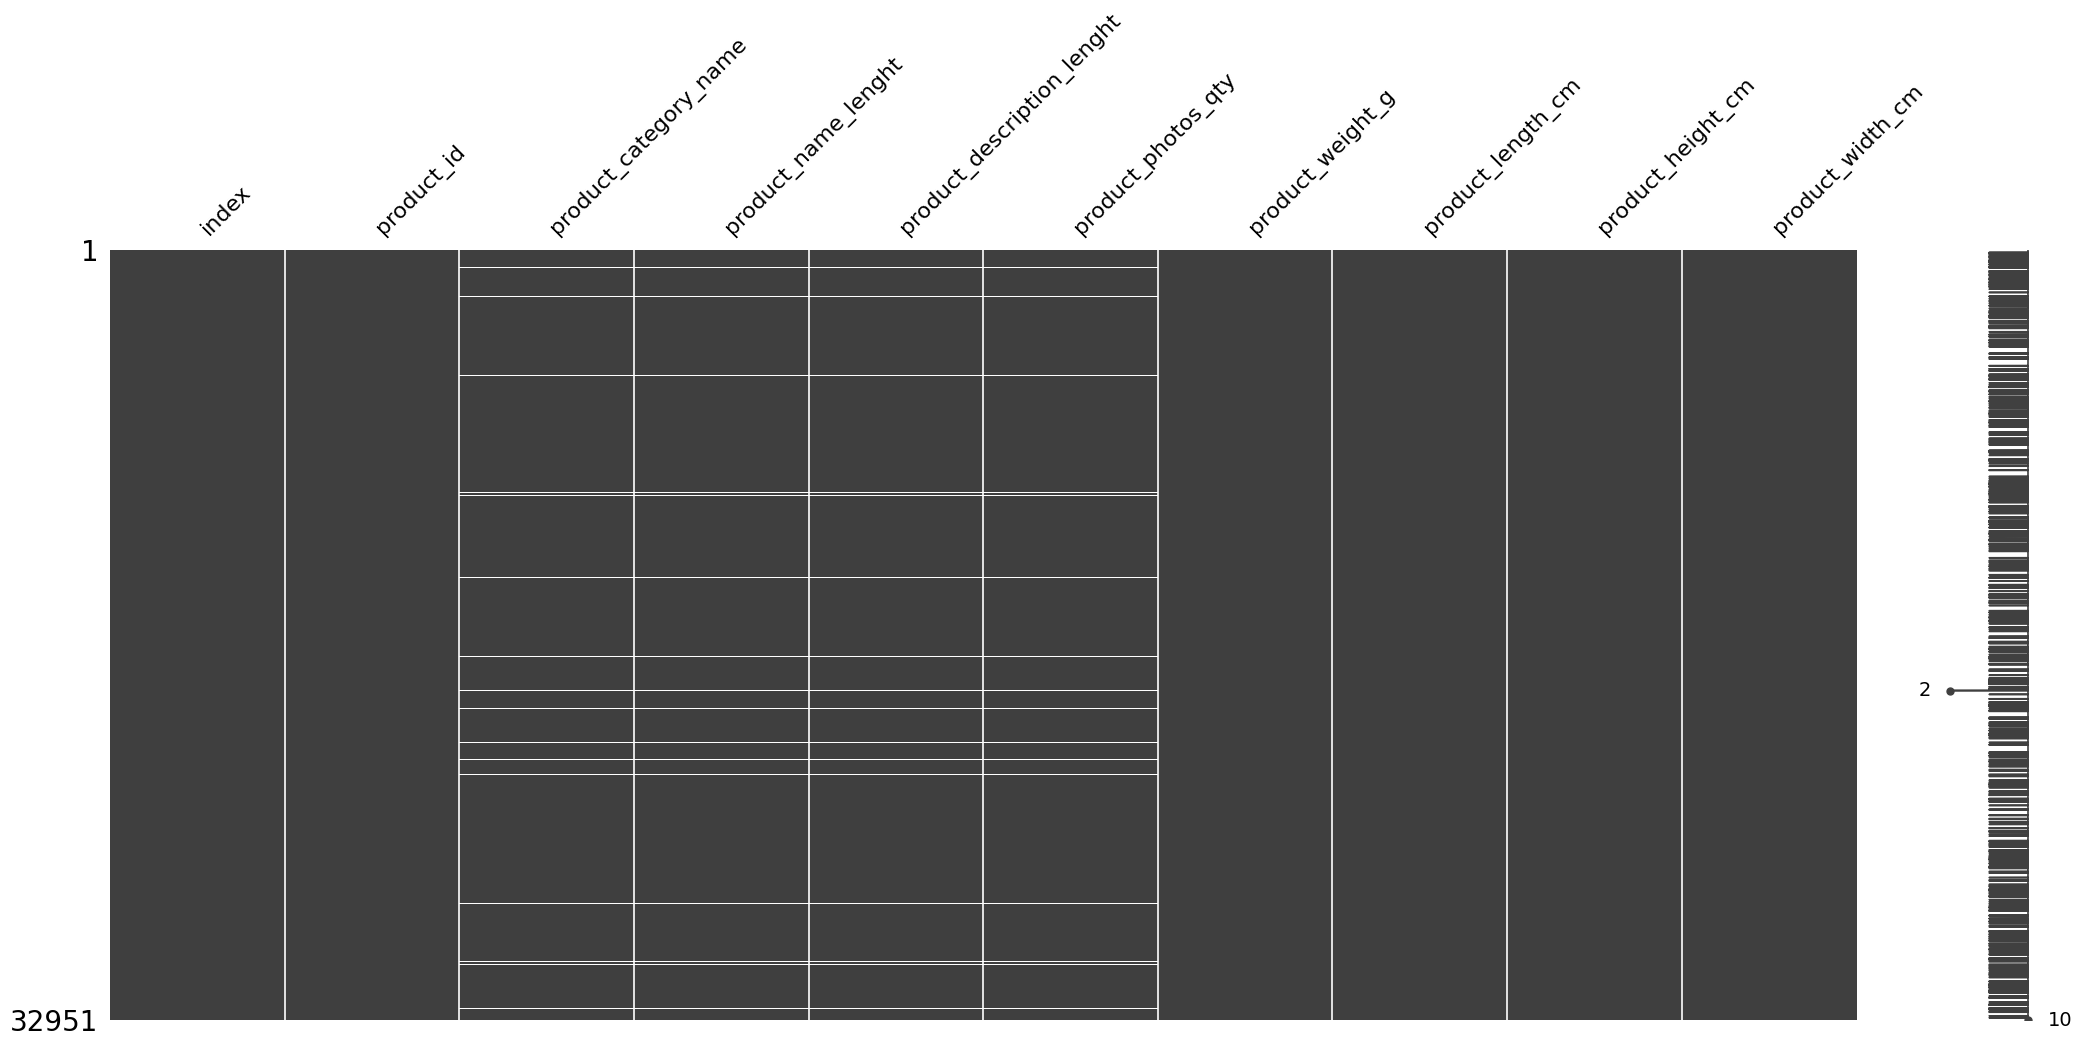

In [ ]:
# Missigno
msn.matrix(data_products)
plt.show()

## **customers**

In [ ]:
data_customers.head()

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# la taille
data_customers.shape

(99441, 6)

In [ ]:
# Les types de chaque variable
data_customers.dtypes

,0
index,int64
customer_id,object
customer_unique_id,object
customer_zip_code_prefix,int64
customer_city,object
customer_state,object


In [ ]:
# Le nombre de ligne dupliquer
data_customers.duplicated().sum()

0

In [ ]:

# Calculer le taux de remplissage des colonnes
missing_values = data_customers.isnull().mean() * 100
print(missing_values)

index                       0.0
customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64


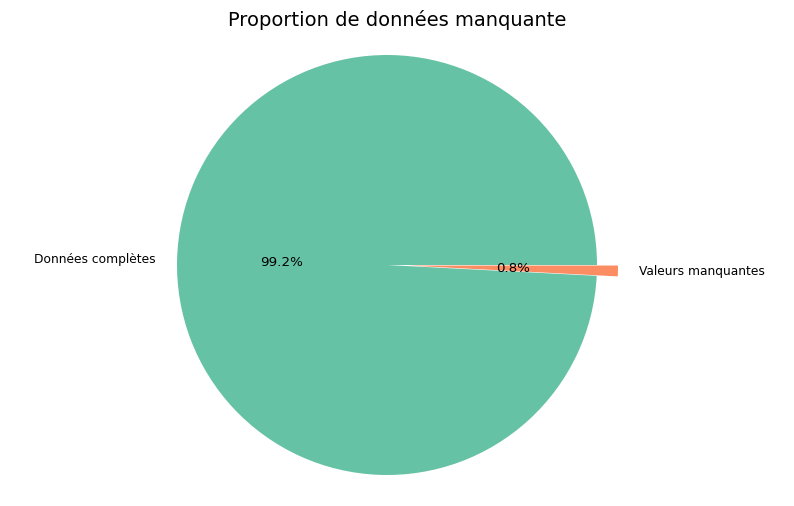

In [ ]:
# proportion de donnee manquante
total_manquant = np.prod(data_customers.shape)
valeur_manquant = data_orders.isna().sum().sum()
labels = ["Données complètes", "Valeurs manquantes"]
vals = [total_manquant - valeur_manquant, valeur_manquant]
explose = (0, 0.1)  
couleurs = ['#66c2a5', '#fc8d62'] 

# Création du graphique en secteurs
plt.figure(figsize=[10, 6])  
plt.pie(x=vals, labels=labels, explode=explose, autopct="%.1f%%", pctdistance=0.5, colors=couleurs)  
plt.title("Proportion de données manquante", fontsize=14)  
plt.axis("equal")  
plt.show()  

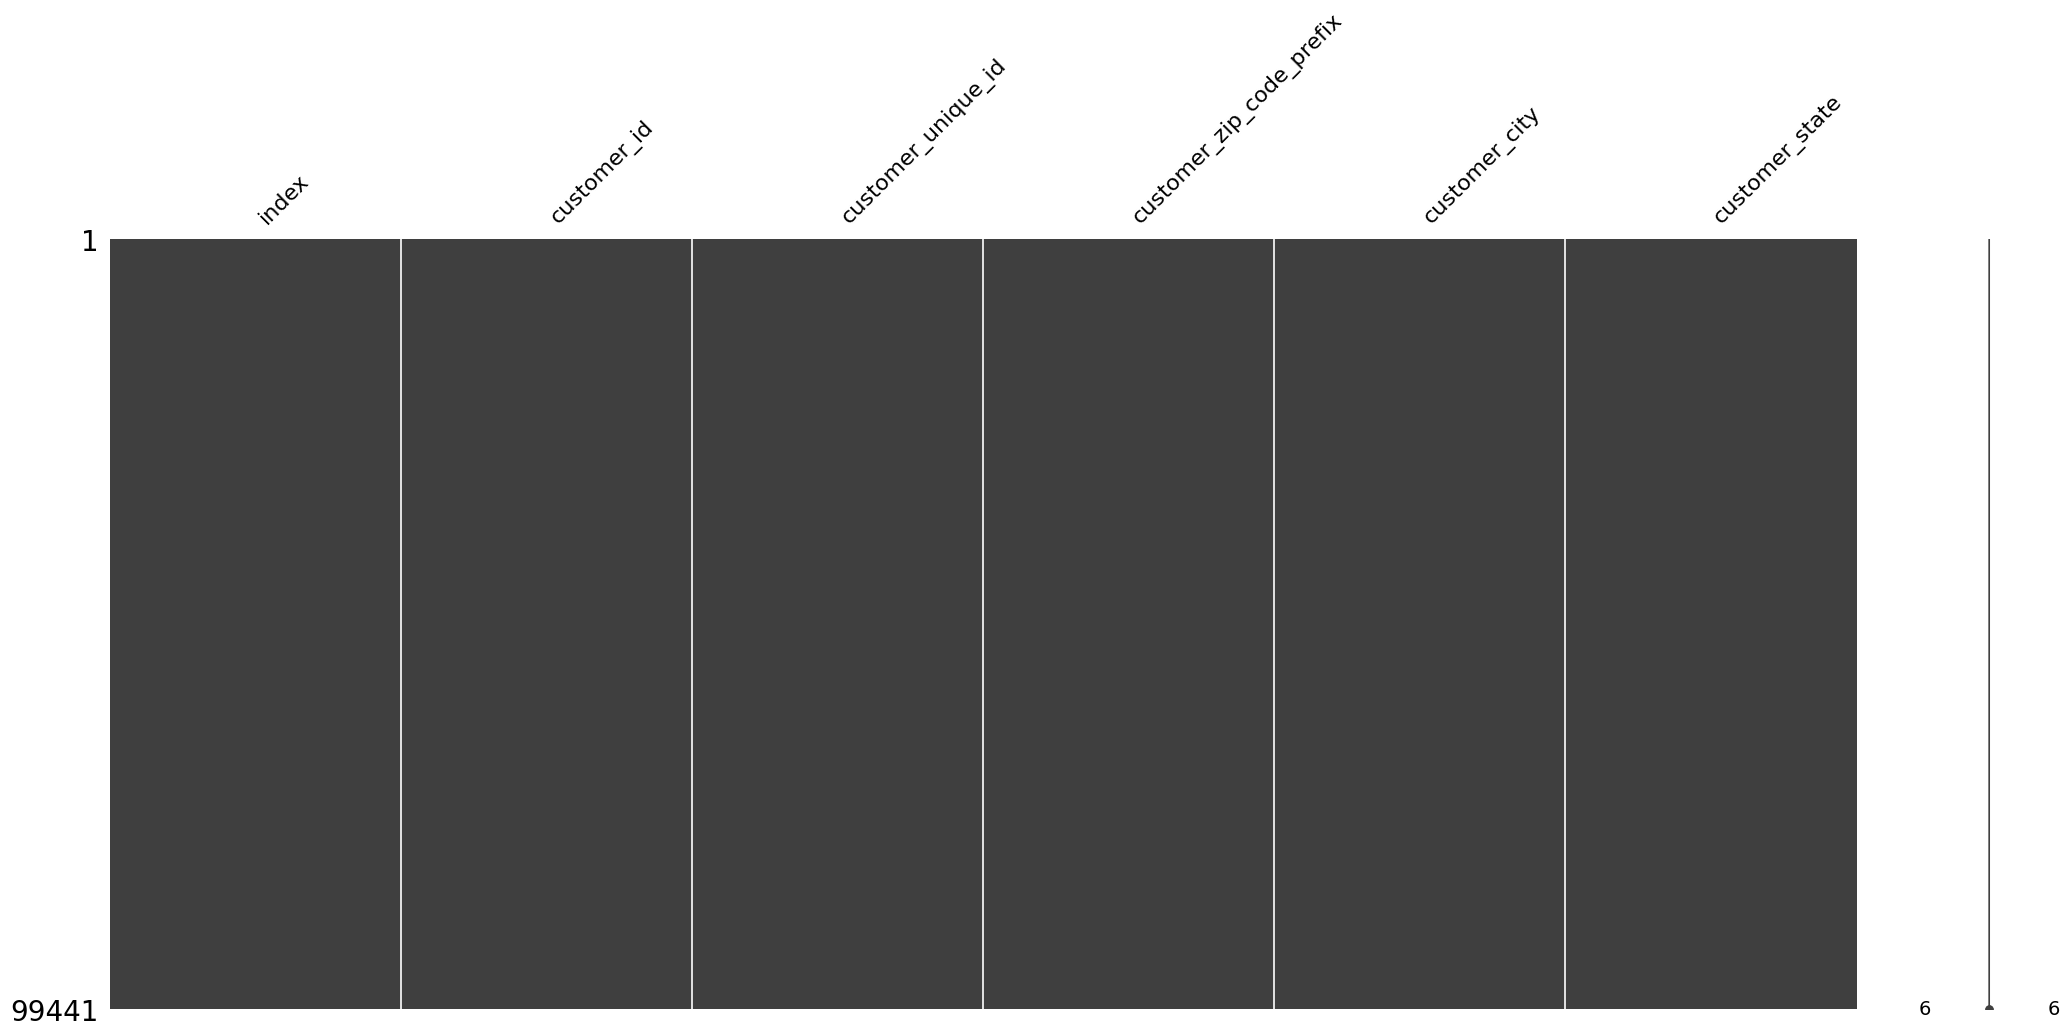

In [ ]:
# Missigno
msn.matrix(data_customers)
plt.show()

# **Distibution des variables**

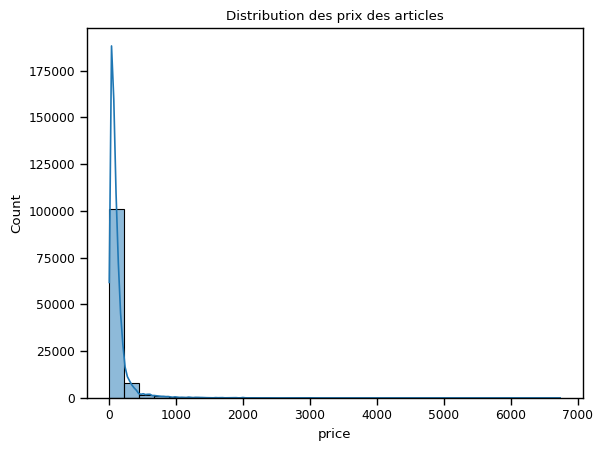

In [ ]:
# Histogramme pour les prix dans data_order_items
sns.histplot(data_order_items['price'], bins=30, kde=True)
plt.title('Distribution des prix des articles')
plt.show()

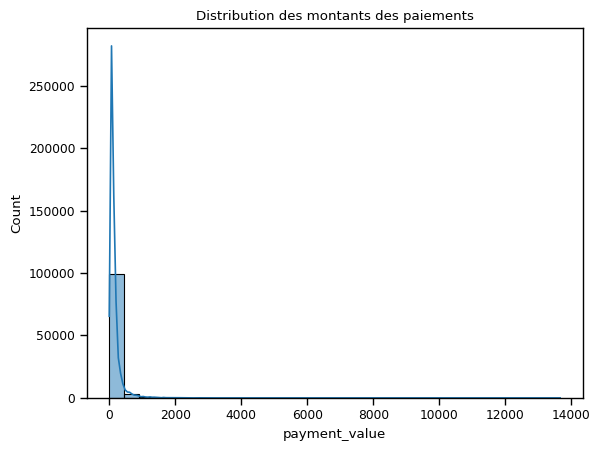

In [ ]:
# Histogramme pour les valeurs des paiements dans data_order_pymts
sns.histplot(data_order_pymts['payment_value'], bins=30, kde=True)
plt.title('Distribution des montants des paiements')
plt.show()

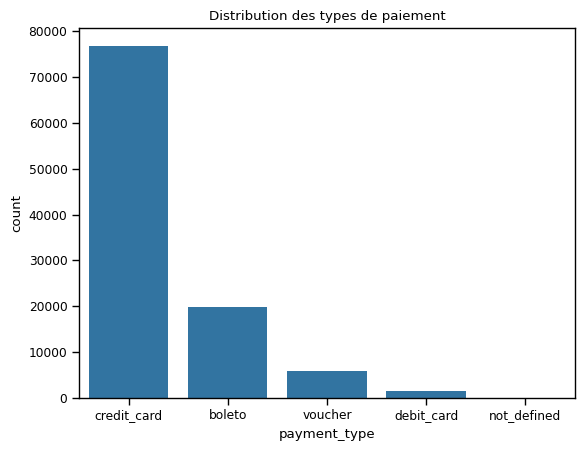

In [ ]:
# Distribution des types de paiement dans data_order_pymts
sns.countplot(x=data_order_pymts['payment_type'])
plt.title('Distribution des types de paiement')
plt.show()

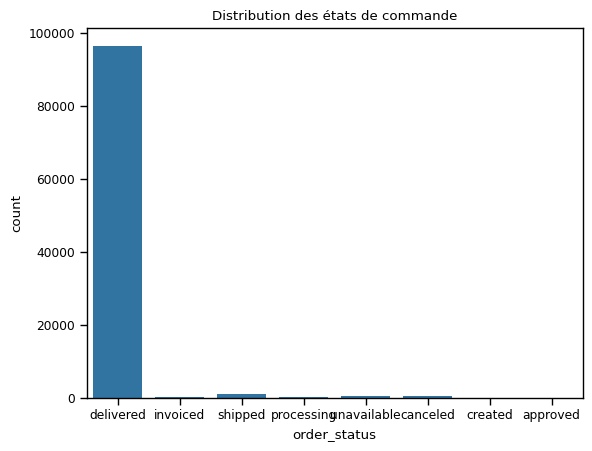

In [ ]:
# Distribution des états de commande dans data_orders
sns.countplot(x=data_orders['order_status'])
plt.title('Distribution des états de commande')
plt.show()

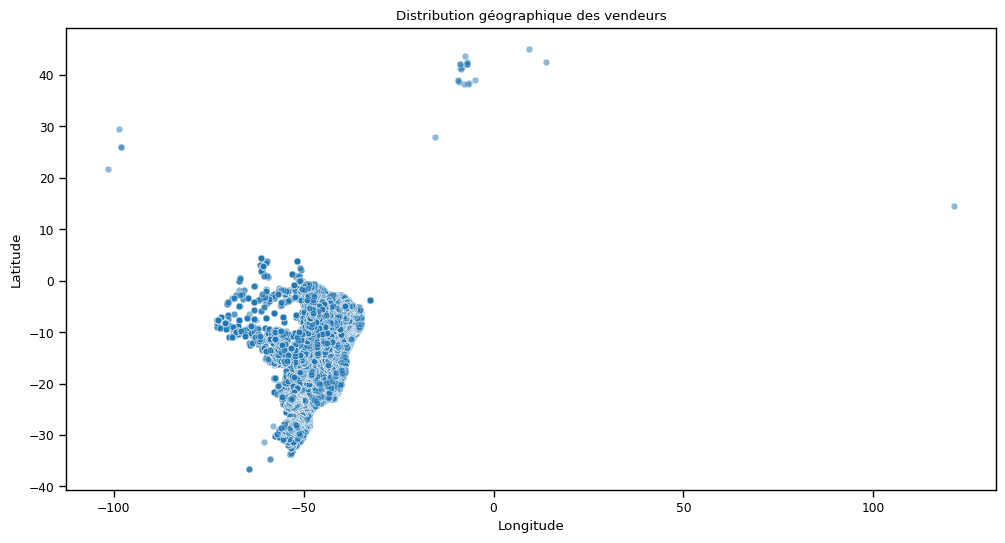

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data_geoloc['geolocation_lng'], y=data_geoloc['geolocation_lat'], alpha=0.5)
plt.title('Distribution géographique des vendeurs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

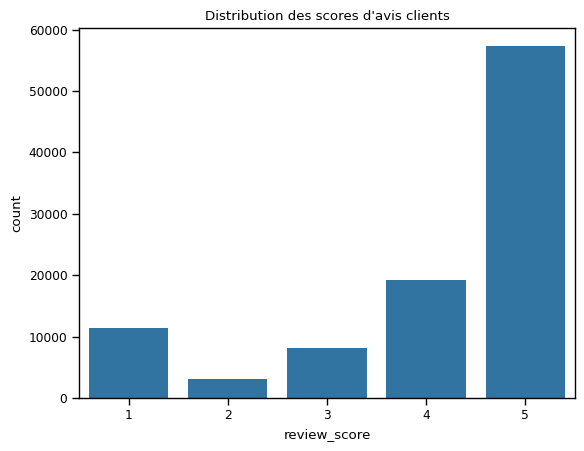

In [ ]:
sns.countplot(x=data_order_reviews['review_score'])
plt.title('Distribution des scores d\'avis clients')
plt.show()


*Commande par date et note*

In [ ]:


# Fusion des commandes avec les avis pour obtenir les dates et les notes
donnees_commandes = pd.merge(
    data_orders[['order_id', 'order_purchase_timestamp']],
    data_order_reviews[['order_id', 'review_score']],
    on='order_id'
)

# Renommer les colonnes pour des noms en français
donnees_commandes.rename(columns={
    'order_purchase_timestamp': 'date_commande',
    'review_score': 'note_commande'
}, inplace=True)

# Convertir la date en format datetime
donnees_commandes['date_commande'] = pd.to_datetime(donnees_commandes['date_commande'])


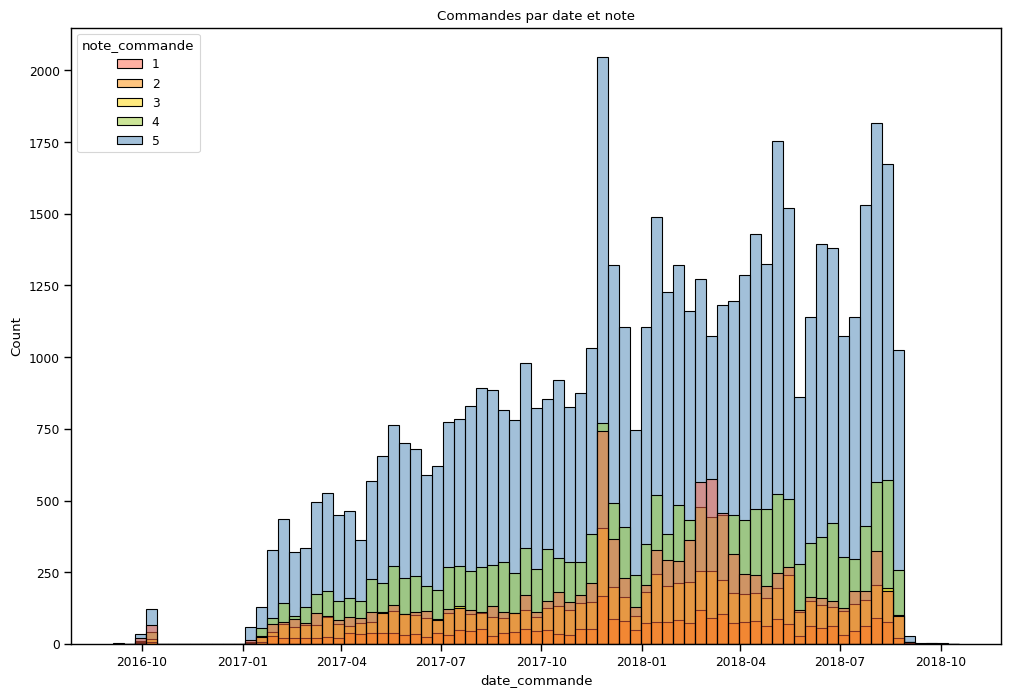

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de la taille de la figure
plt.figure(figsize=(12, 8))

# Création de l'histogramme avec la date des dernières commandes et les notes par commande
# Choix d'une palette personnalisée
palette_custom = {
    1: '#FF6347',  
    2: '#FF8C00',  
    3: '#FFD700',  
    4: '#9ACD32',  
    5: '#4682B4'   
}

sns.histplot(x='date_commande', hue='note_commande', data=donnees_commandes, palette=palette_custom)

# Ajout d'un titre à la visualisation
plt.title('Commandes par date et note')



# Affichage de la figure
plt.show()


*Repartition des note en diagramme de cercle (camembert)*

In [ ]:
# Calculer la répartition des notes
repartition_notes = donnees_commandes['note_commande'].value_counts()


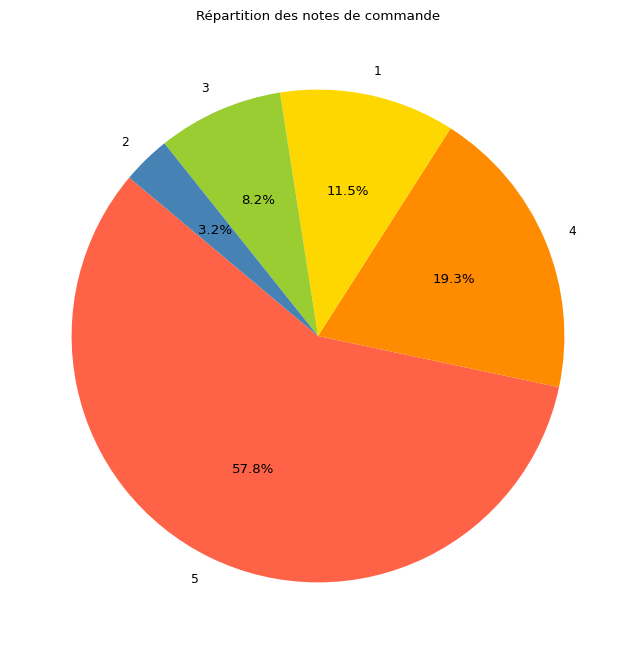

In [ ]:


# Création du diagramme en cercle
plt.figure(figsize=(8, 8))

# Palette personnalisée pour le diagramme en cercle
couleurs = ['#FF6347', '#FF8C00', '#FFD700', '#9ACD32', '#4682B4']

# Création du diagramme en cercle
plt.pie(repartition_notes, labels=repartition_notes.index, autopct='%1.1f%%', colors=couleurs, startangle=140)

# Titre du graphique
plt.title('Répartition des notes de commande')

# Affichage du graphique
plt.show()


*top 20 des category des produits*

In [ ]:

# Compter le nombre de produits par catégorie
repartition_categories = data_products['product_category_name'].value_counts()


In [ ]:
# Sélectionner les 20 premières catégories
top_20_categories = repartition_categories.head(20)

<ipython-input-265-281ca37fd05d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_categories.values, y=top_20_categories.index, palette='magma')


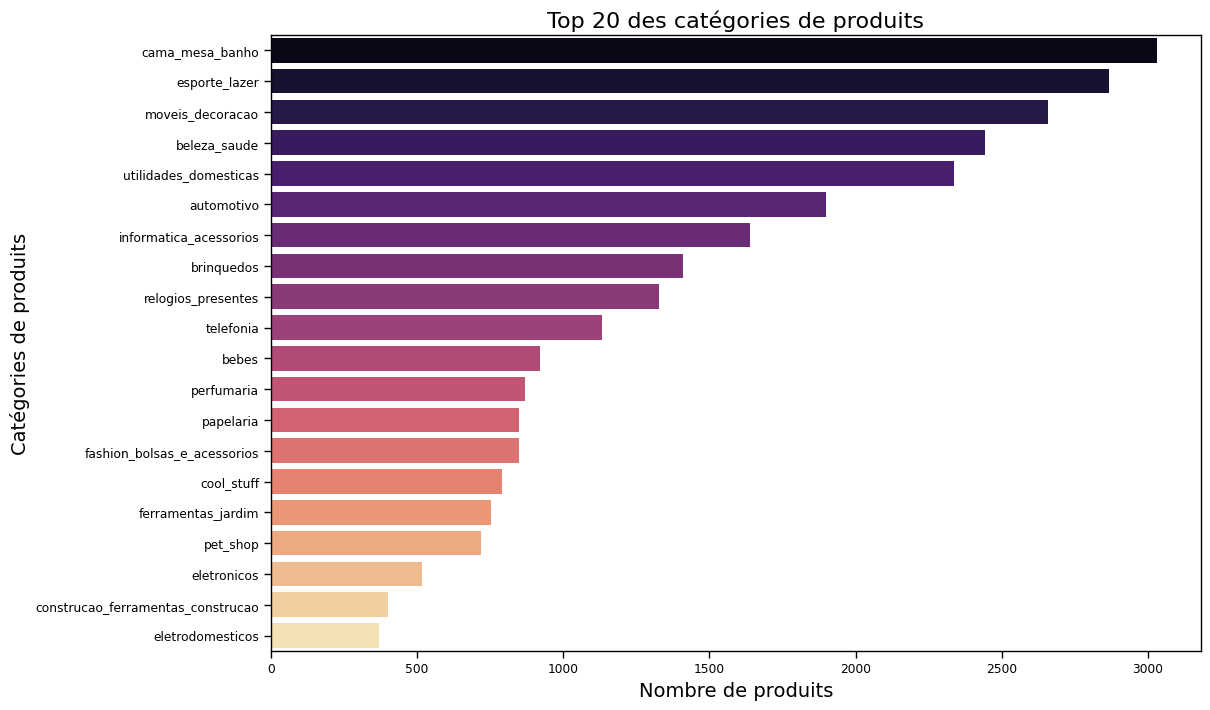

In [ ]:
# Configurer la taille de la figure
plt.figure(figsize=(12, 8))

# Création du diagramme en barres pour les 20 premières catégories
sns.barplot(x=top_20_categories.values, y=top_20_categories.index, palette='magma')

# Ajouter un titre et des labels
plt.title('Top 20 des catégories de produits', fontsize=16)
plt.xlabel('Nombre de produits', fontsize=14)
plt.ylabel('Catégories de produits', fontsize=14)


# Affichage du graphique
plt.show()
